# Acquire & Prepare

## Imports

In [1]:
import sys

sys.path.append('/Users/nickolaspedrimiranda/CodeUp/Regression-Project/')

In [18]:
# Import basic DS libraries
import pandas as pd
import numpy as np

# Import libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Import useful DS functions
import acquire as ac
import prepare as prep
import evaluate as ev
import explore as ex
import viz


#modeling
from sklearn.cluster import KMeans

## Acquire

In [3]:
wine = ac.get_wine() # acquire data

In [4]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
def reajust_range(wine):
    wine = wine[wine.fixed_acidity < 12]
    wine = wine[wine.volatile_acidity < 1.0]
    wine = wine[wine.citric_acid < 0.8]
    wine = wine[wine.residual_sugar < 22]
    wine = wine[wine.chlorides < .15]
    wine = wine[wine.free_sulfur_dioxide < 100]
    wine = wine[wine.total_sulfur_dioxide < 300]
    wine = wine[wine.density < 1.01]
    #wine = wine[wine.pH < 5]
    wine = wine[wine.sulphates < 1.15]
    # wine = wine[wine.alcohol < 1000]
    return wine

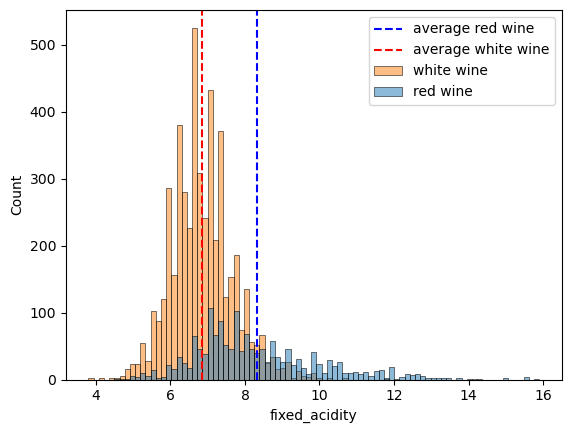

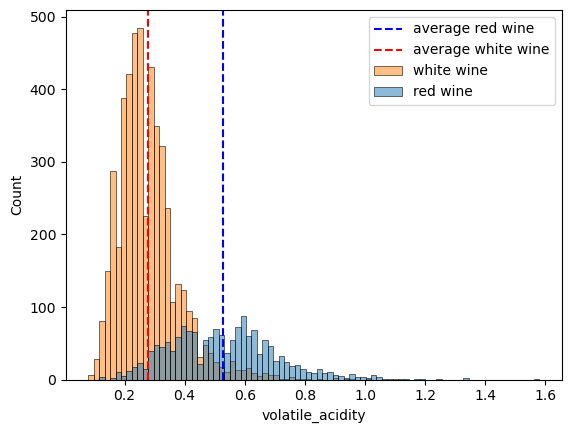

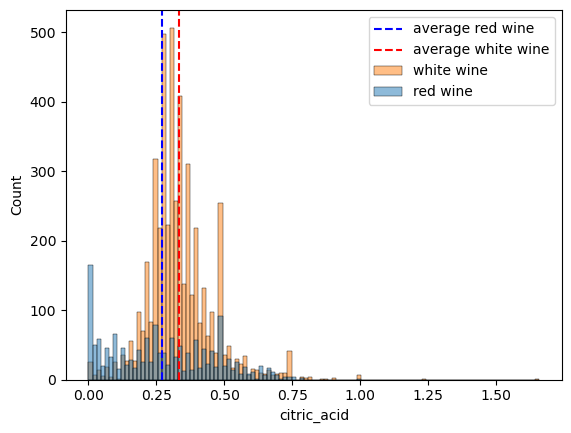

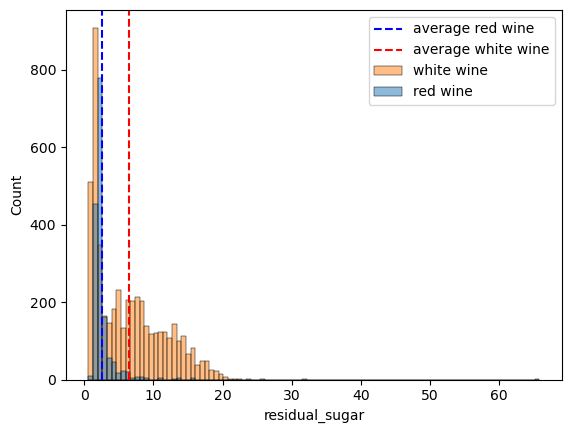

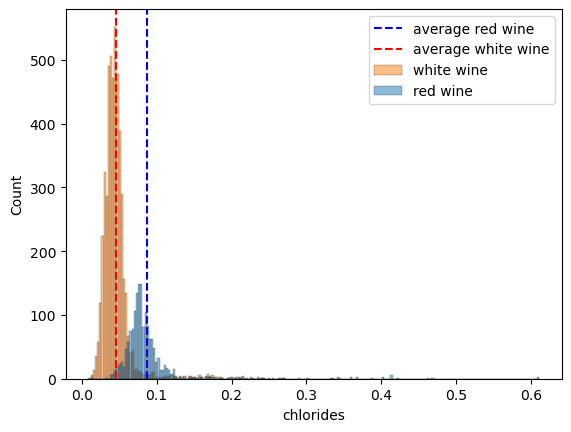

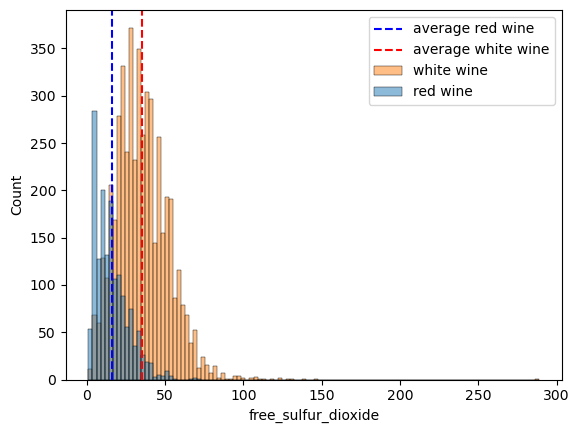

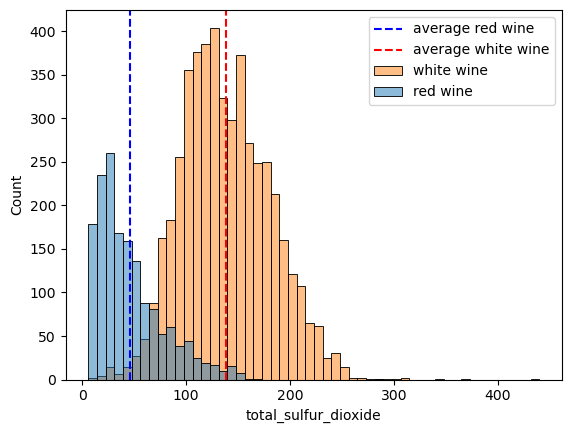

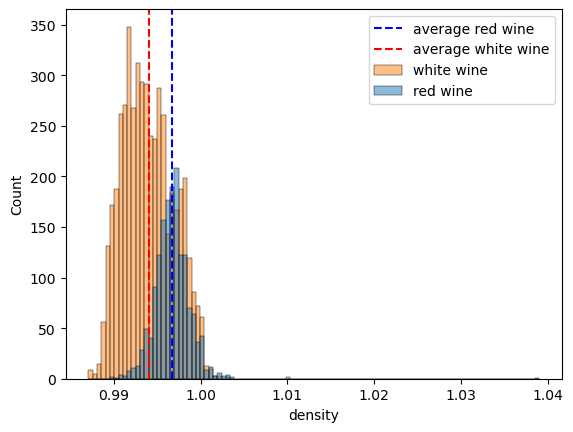

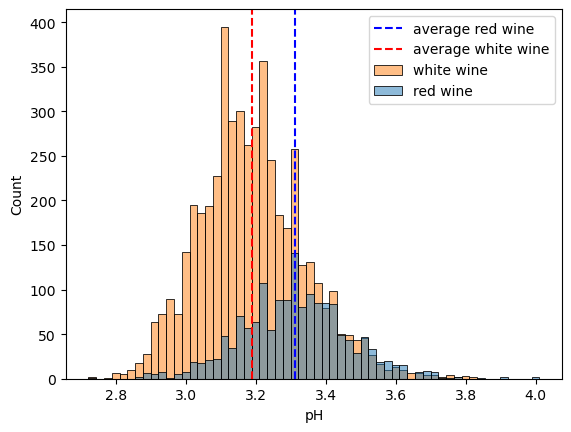

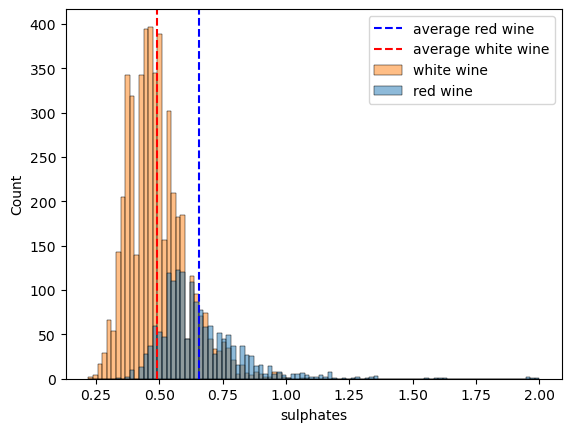

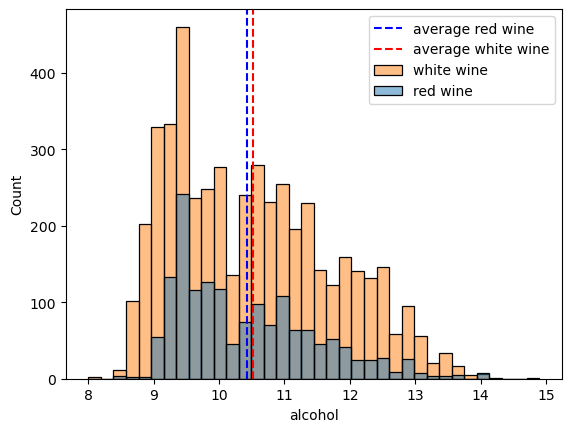

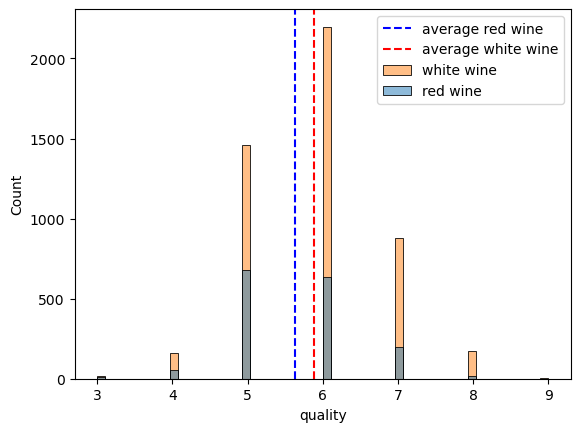

In [6]:
red = wine[wine.wine_type == 'red']
white = wine[wine.wine_type == 'white']

for col in wine.columns:
    if col == 'wine_type':
        continue
    plt.figure()
    sns.histplot(wine, x=col, hue='wine_type')
    plt.axvline(x = red[col].mean(), color = 'blue', linestyle='dashed')
    plt.axvline(x = white[col].mean(), color = 'red', linestyle='dashed')
    plt.legend(labels=['average red wine','average white wine','white wine','red wine'])
    plt.show()

In [7]:
wine = reajust_range(wine)

In [12]:
len(wine)/len(ac.get_wine())

0.9576727720486379

We retain 95% of the data after readjusting the ranges of values

In [8]:
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


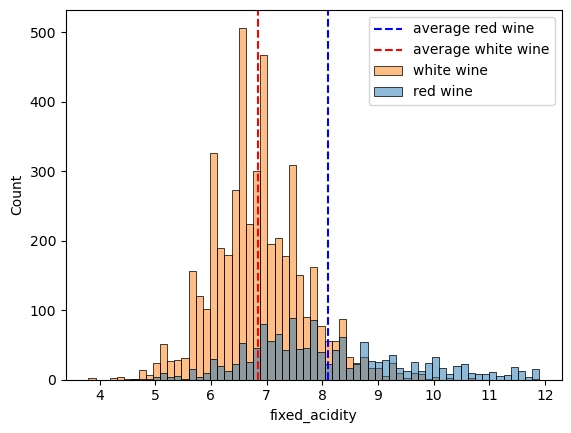

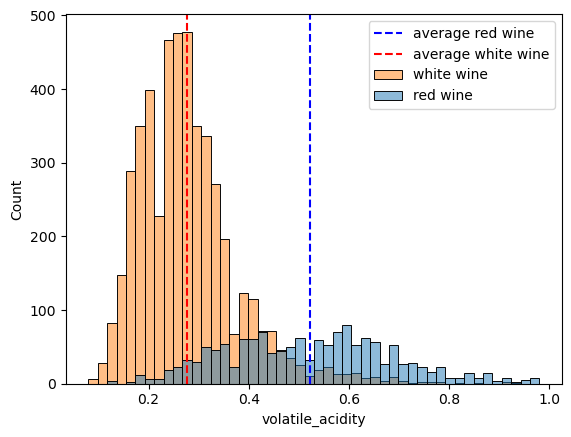

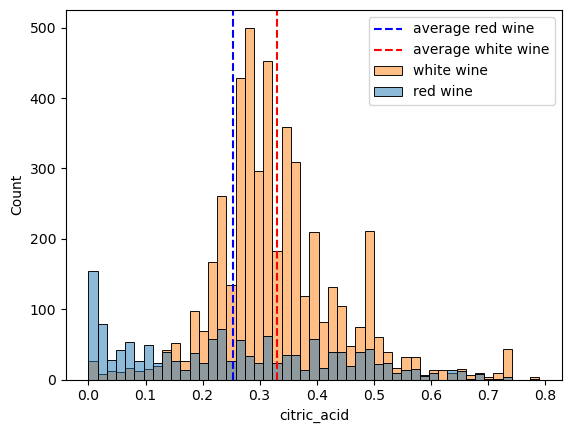

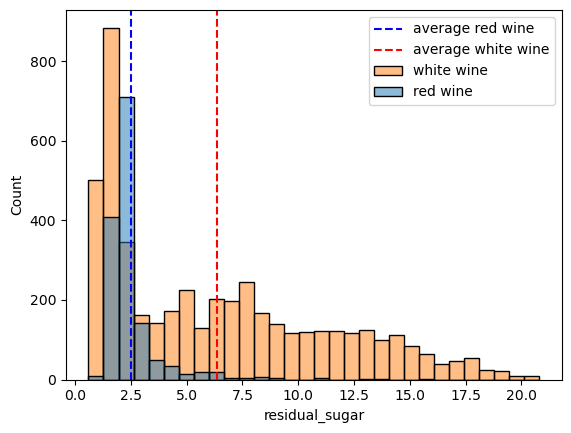

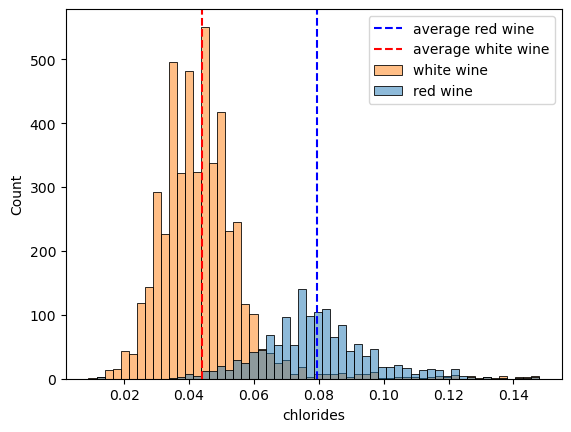

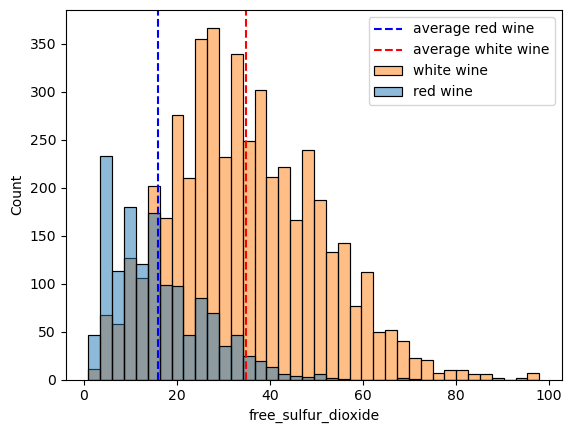

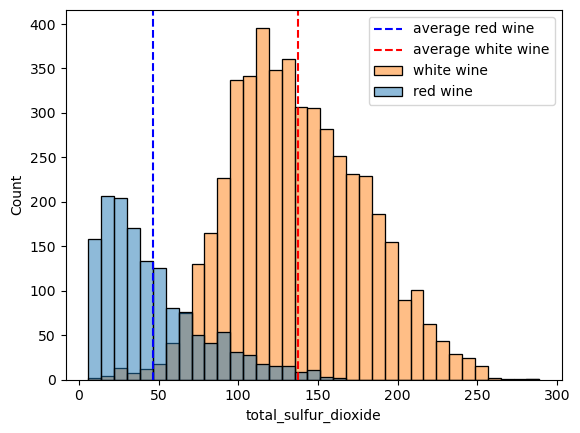

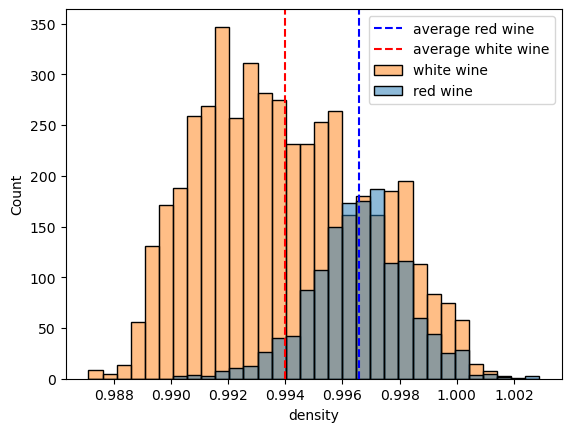

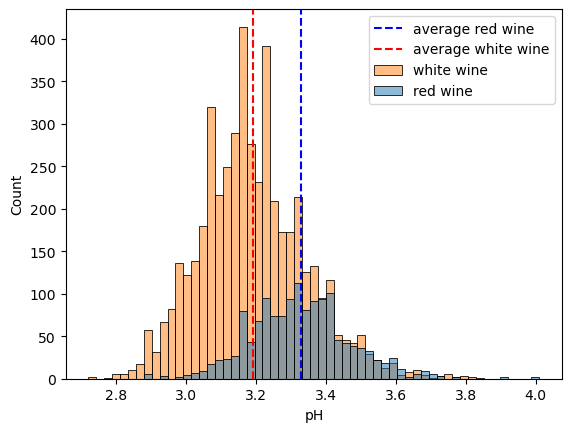

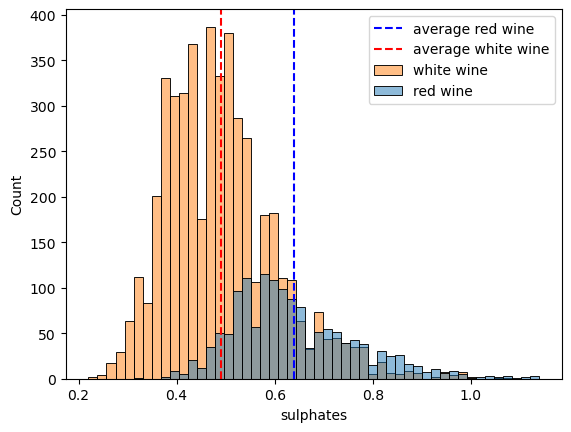

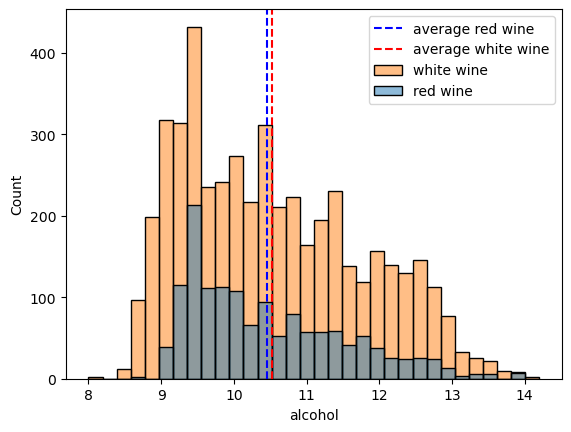

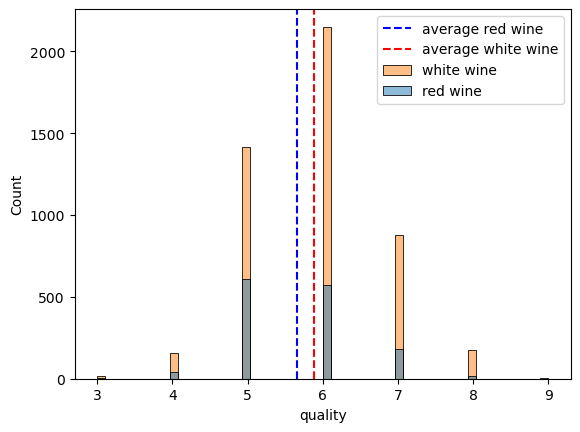

In [9]:
red = wine[wine.wine_type == 'red']
white = wine[wine.wine_type == 'white']

for col in wine.columns:
    if col == 'wine_type':
        continue
    plt.figure()
    sns.histplot(wine, x=col, hue='wine_type')
    plt.axvline(x = red[col].mean(), color = 'blue', linestyle='dashed')
    plt.axvline(x = white[col].mean(), color = 'red', linestyle='dashed')
    plt.legend(labels=['average red wine','average white wine','white wine','red wine'])
    plt.show()

# Modeling

In [39]:
seed = 100

In [40]:
wine, val, test = prep.train_val_test(wine, strat='quality', seed=seed)
#train, val, test = prep.scale(wine, train=train, val=val, test=test, scaled_cols=(wine.select_dtypes(float).columns))
#train, val, test = prep.dummies(train, val, test, drop_first=['wine_type'])

In [17]:
# viz.cont_plots(wine, wine.select_dtypes(float).columns)

<Axes: xlabel='total_sulfur_dioxide', ylabel='chlorides'>

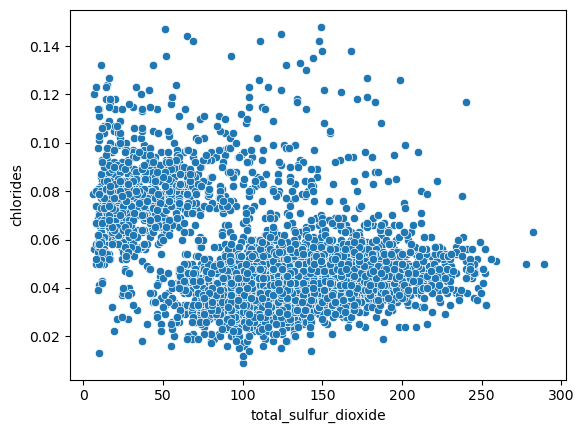

In [41]:
sns.scatterplot(wine, x='total_sulfur_dioxide', y='chlorides')

Total sulfur dioxides by chloride

In [42]:
copy_wine = wine.copy()

In [43]:
X = wine[['total_sulfur_dioxide', 'chlorides']]

kmeans = KMeans(n_init='auto')
kmeans.fit(X)

m1_pred = kmeans.predict(X).astype(str)

In [44]:
copy_wine['m1'] = m1_pred

<Axes: xlabel='total_sulfur_dioxide', ylabel='chlorides'>

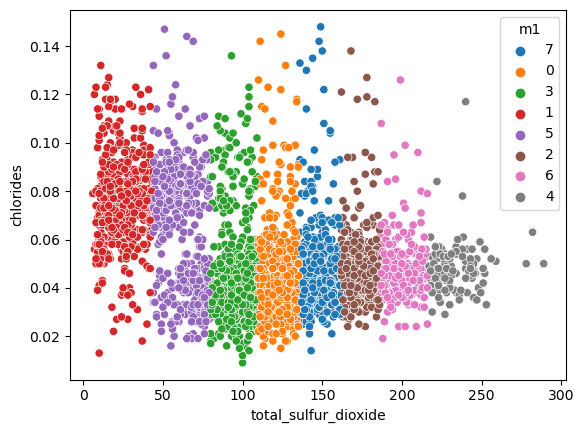

In [45]:
sns.scatterplot(copy_wine, x='total_sulfur_dioxide', y='chlorides', hue='m1')

In [50]:
wine = ac.get_wine()

In [51]:
wine = ex.reajust_range(wine)
# wine = wine.drop(columns='residual_sugar')

In [52]:
train, val, test = prep.train_val_test(wine, strat='quality', seed=seed)
train, val, test = prep.scale(wine, train=train, val=val, test=test, scaled_cols=(wine.select_dtypes(float).columns))
train, val, test = prep.dummies(train, val, test, drop_first=['wine_type'])

In [ ]:
def drink_up():
    wine = ac.get_wine()
    wine = ex.reajust_range(wine)
    train, val, test = prep.train_val_test(wine, strat='quality', seed=seed)
    train, val, test = prep.scale(wine, train=train, val=val, test=test, scaled_cols=(wine.select_dtypes(float).columns))
    train, val, test = prep.dummies(train, val, test, drop_first=['wine_type'])
    return  train, val, test

In [69]:
X = train[['total_sulfur_dioxide', 'chlorides', 'density']]

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

m2_pred = kmeans.predict(X).astype(str)

In [70]:
copy_wine_2 = train.copy()

In [71]:
copy_wine_2['m2_scaled'] = m2_pred

<Axes: xlabel='total_sulfur_dioxide', ylabel='chlorides'>

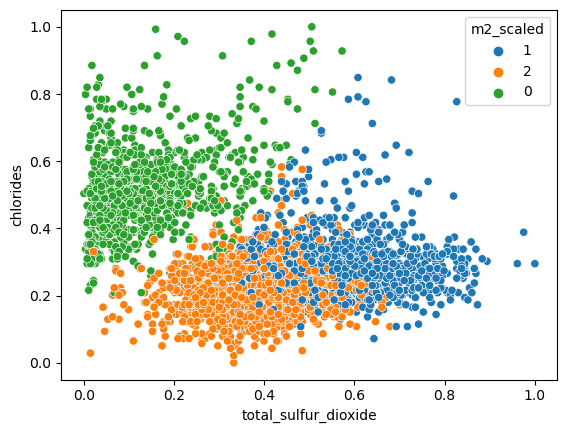

In [72]:
sns.scatterplot(copy_wine_2, x='total_sulfur_dioxide', y='chlorides', hue='m2_scaled')

In [ ]:
X = train[['total_sulfur_dioxide', 'chlorides']]

kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(X)

m2_pred = kmeans.predict(X).astype(str)